### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [24]:
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") # styling your charts

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# modeling
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

# validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

print("All modules loaded")

All modules loaded


In [29]:
#df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
# loading the data
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/bank-additional-full.csv'
df = pd.read_csv(url, sep = ';')

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [73]:
df.isna().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [75]:
df.duplicated().sum()

0

In [77]:
df.drop_duplicates(inplace=True)

In [79]:
df.shape

(41176, 21)

The data has no missing entires, 12 duplicates were dropped, reducing the data dimensions to 41,1176 rows and 12 columns. 

In [54]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [57]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [59]:
df['job'].unique

<bound method Series.unique of 0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41176, dtype: object>

In [61]:
df['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [65]:
df['y'] = df['y'].replace({"yes":1, "no":0})

<Axes: xlabel='job'>

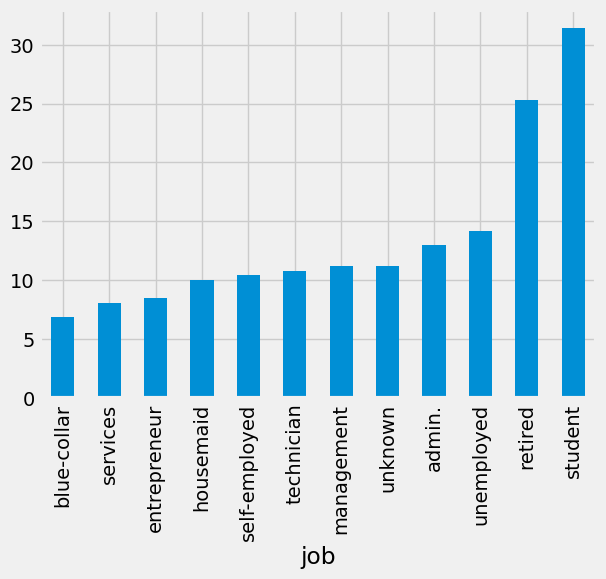

In [67]:
df.groupby('job')['y'].mean().round(3).multiply(100).sort_values().plot(kind ='bar')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

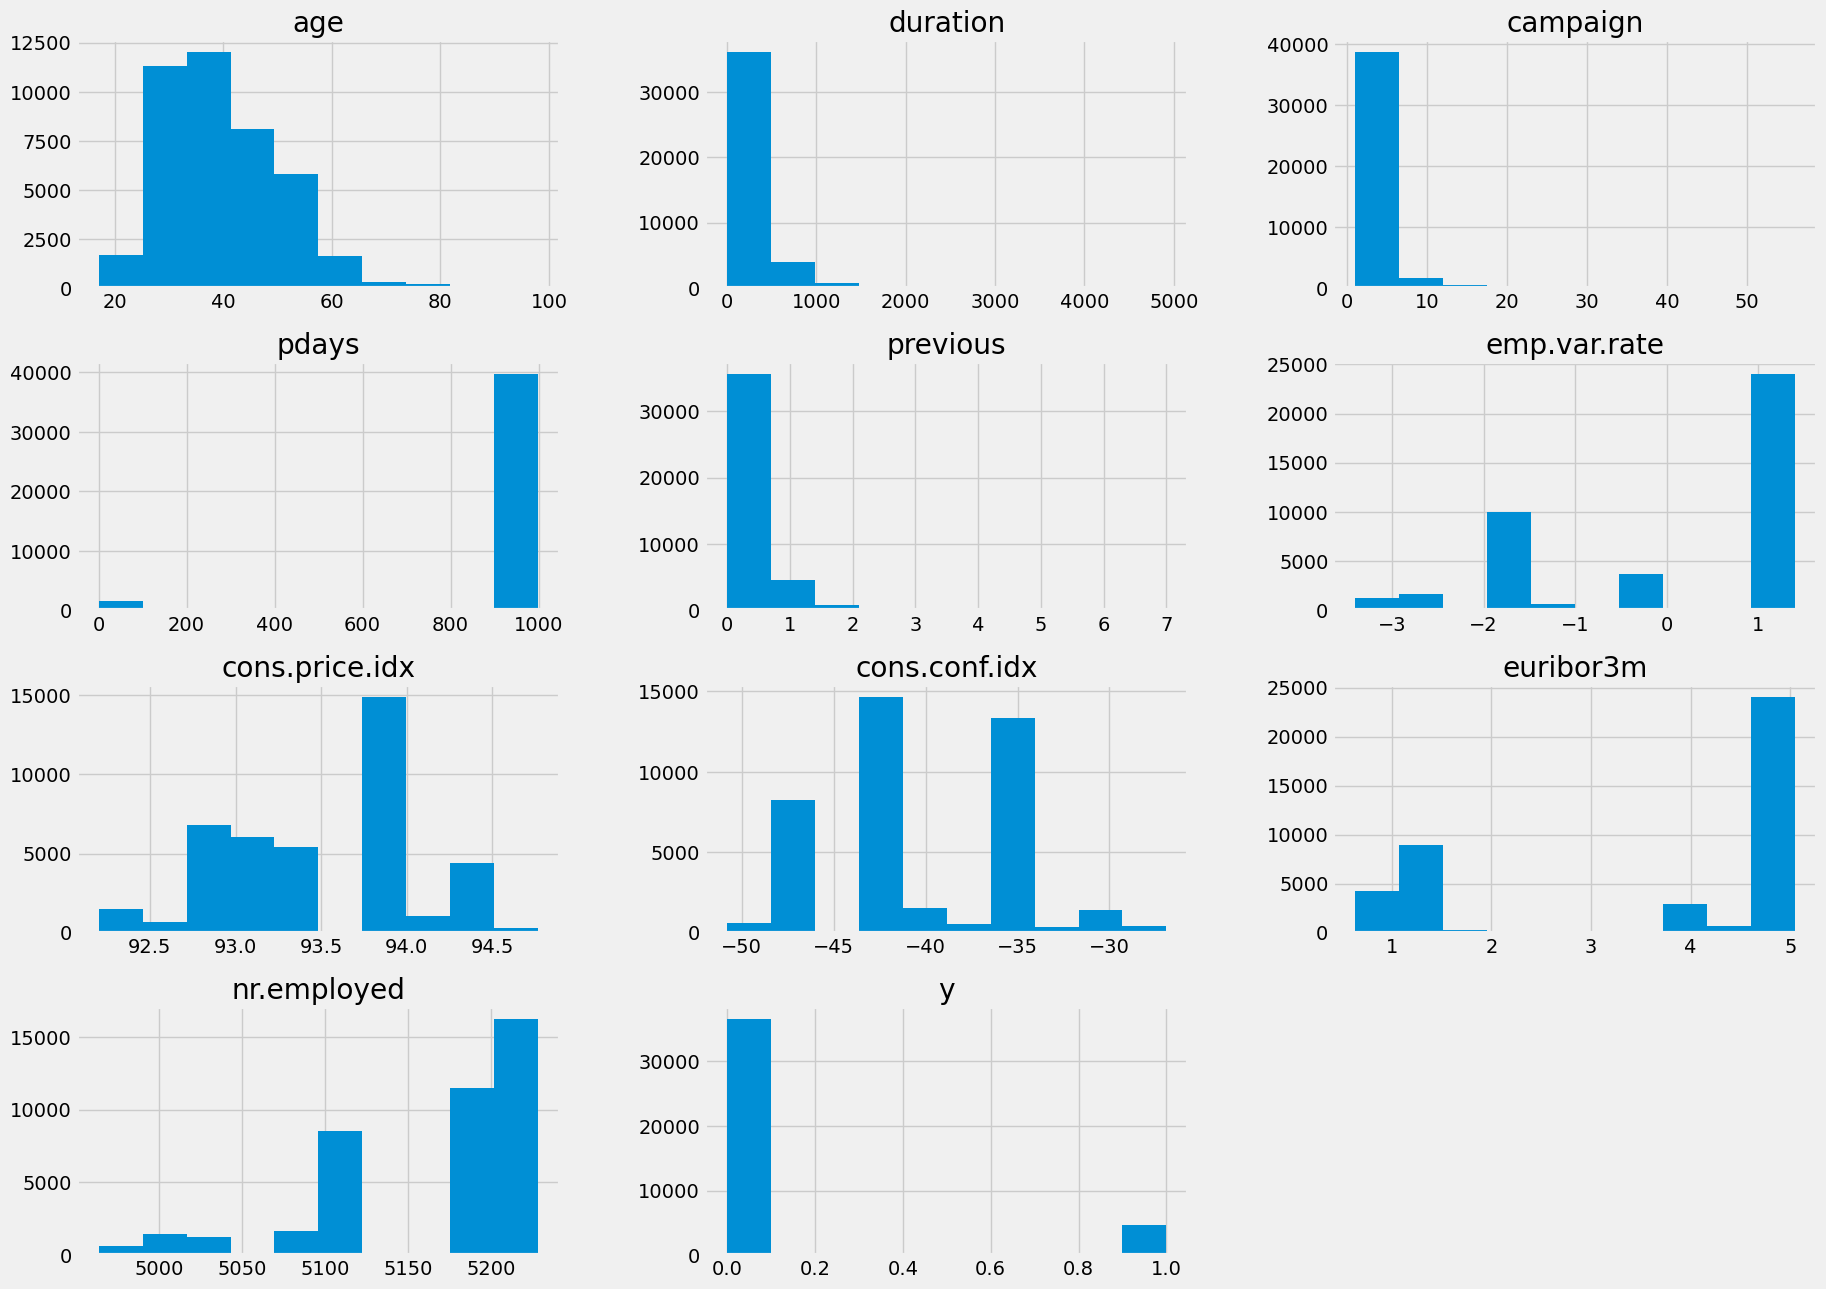

In [69]:
df.hist(figsize = (20,15))

<Axes: ylabel='Density'>

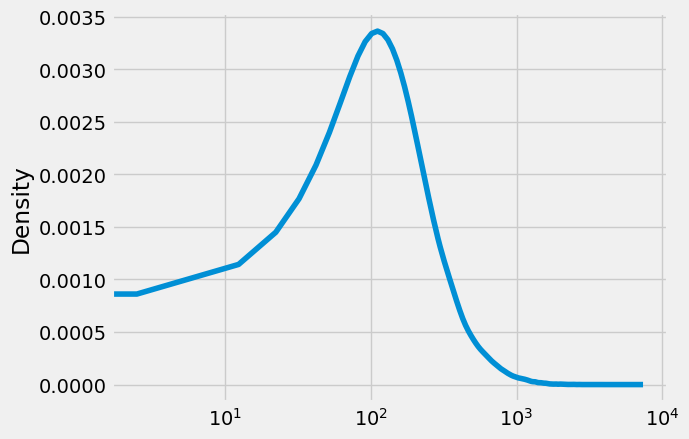

In [87]:
df.duration.plot(kind= 'kde', logx = True)

In [104]:
df[num_list].head(1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0


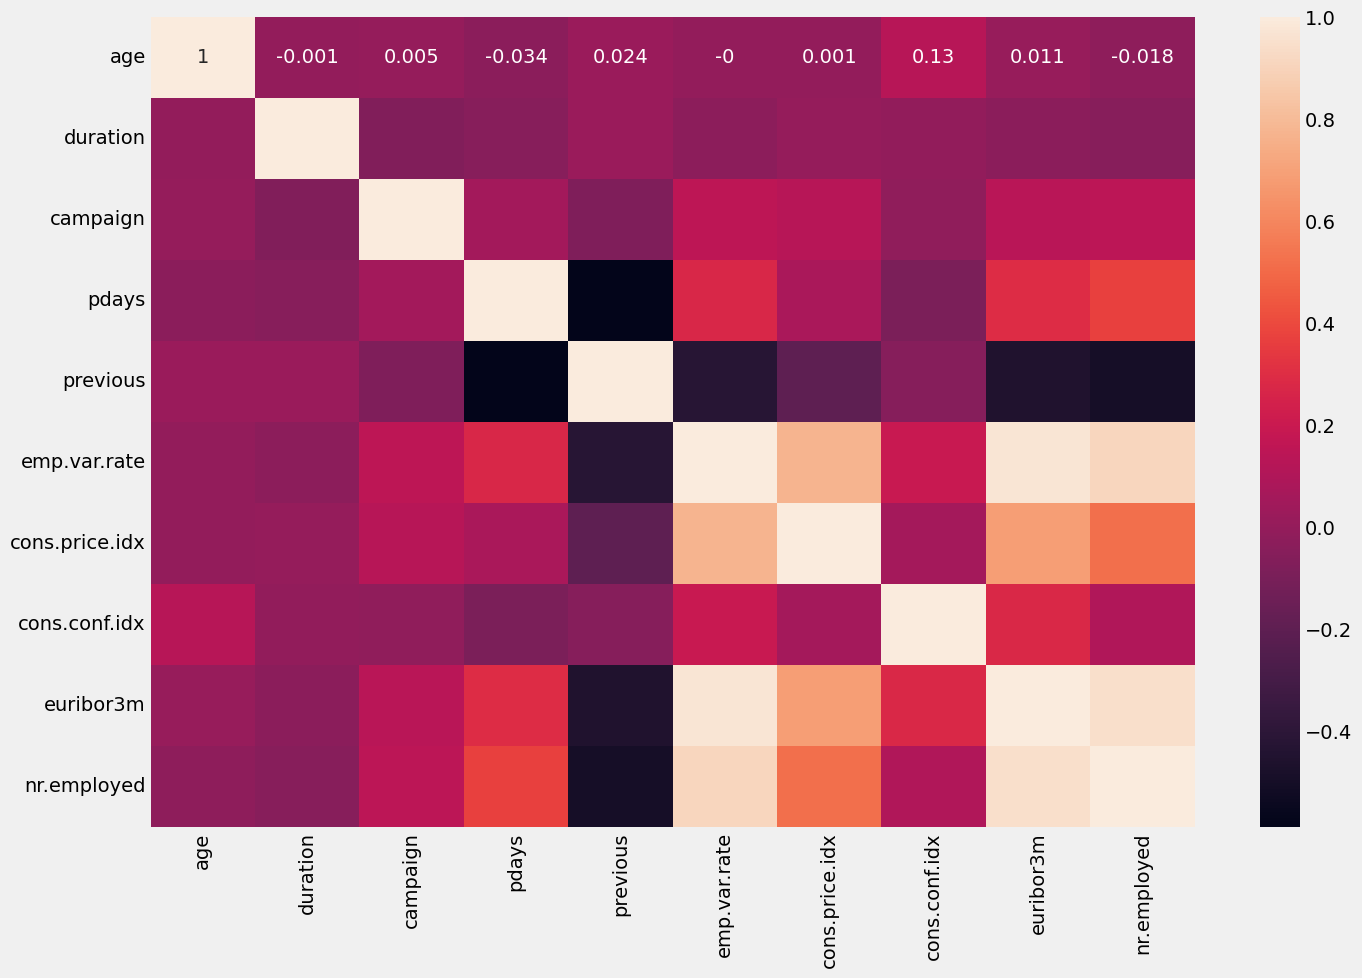

In [110]:
corr = df[num_list].corr().round(3)

plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True);

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The task's business objective is to identify the best classifiers for a targeted campaign where the number of contacts will be minimized and the number of successful contacts or success rate will be maximized. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [115]:
num_list = (df
 .select_dtypes(['int', 'float'])
 .drop('y', axis = 1)
 .columns
 .tolist())

In [118]:
df[num_list].head(1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [121]:
X = df[num_list]
y = df.y

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Scaling Numerical Cols

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [135]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [141]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

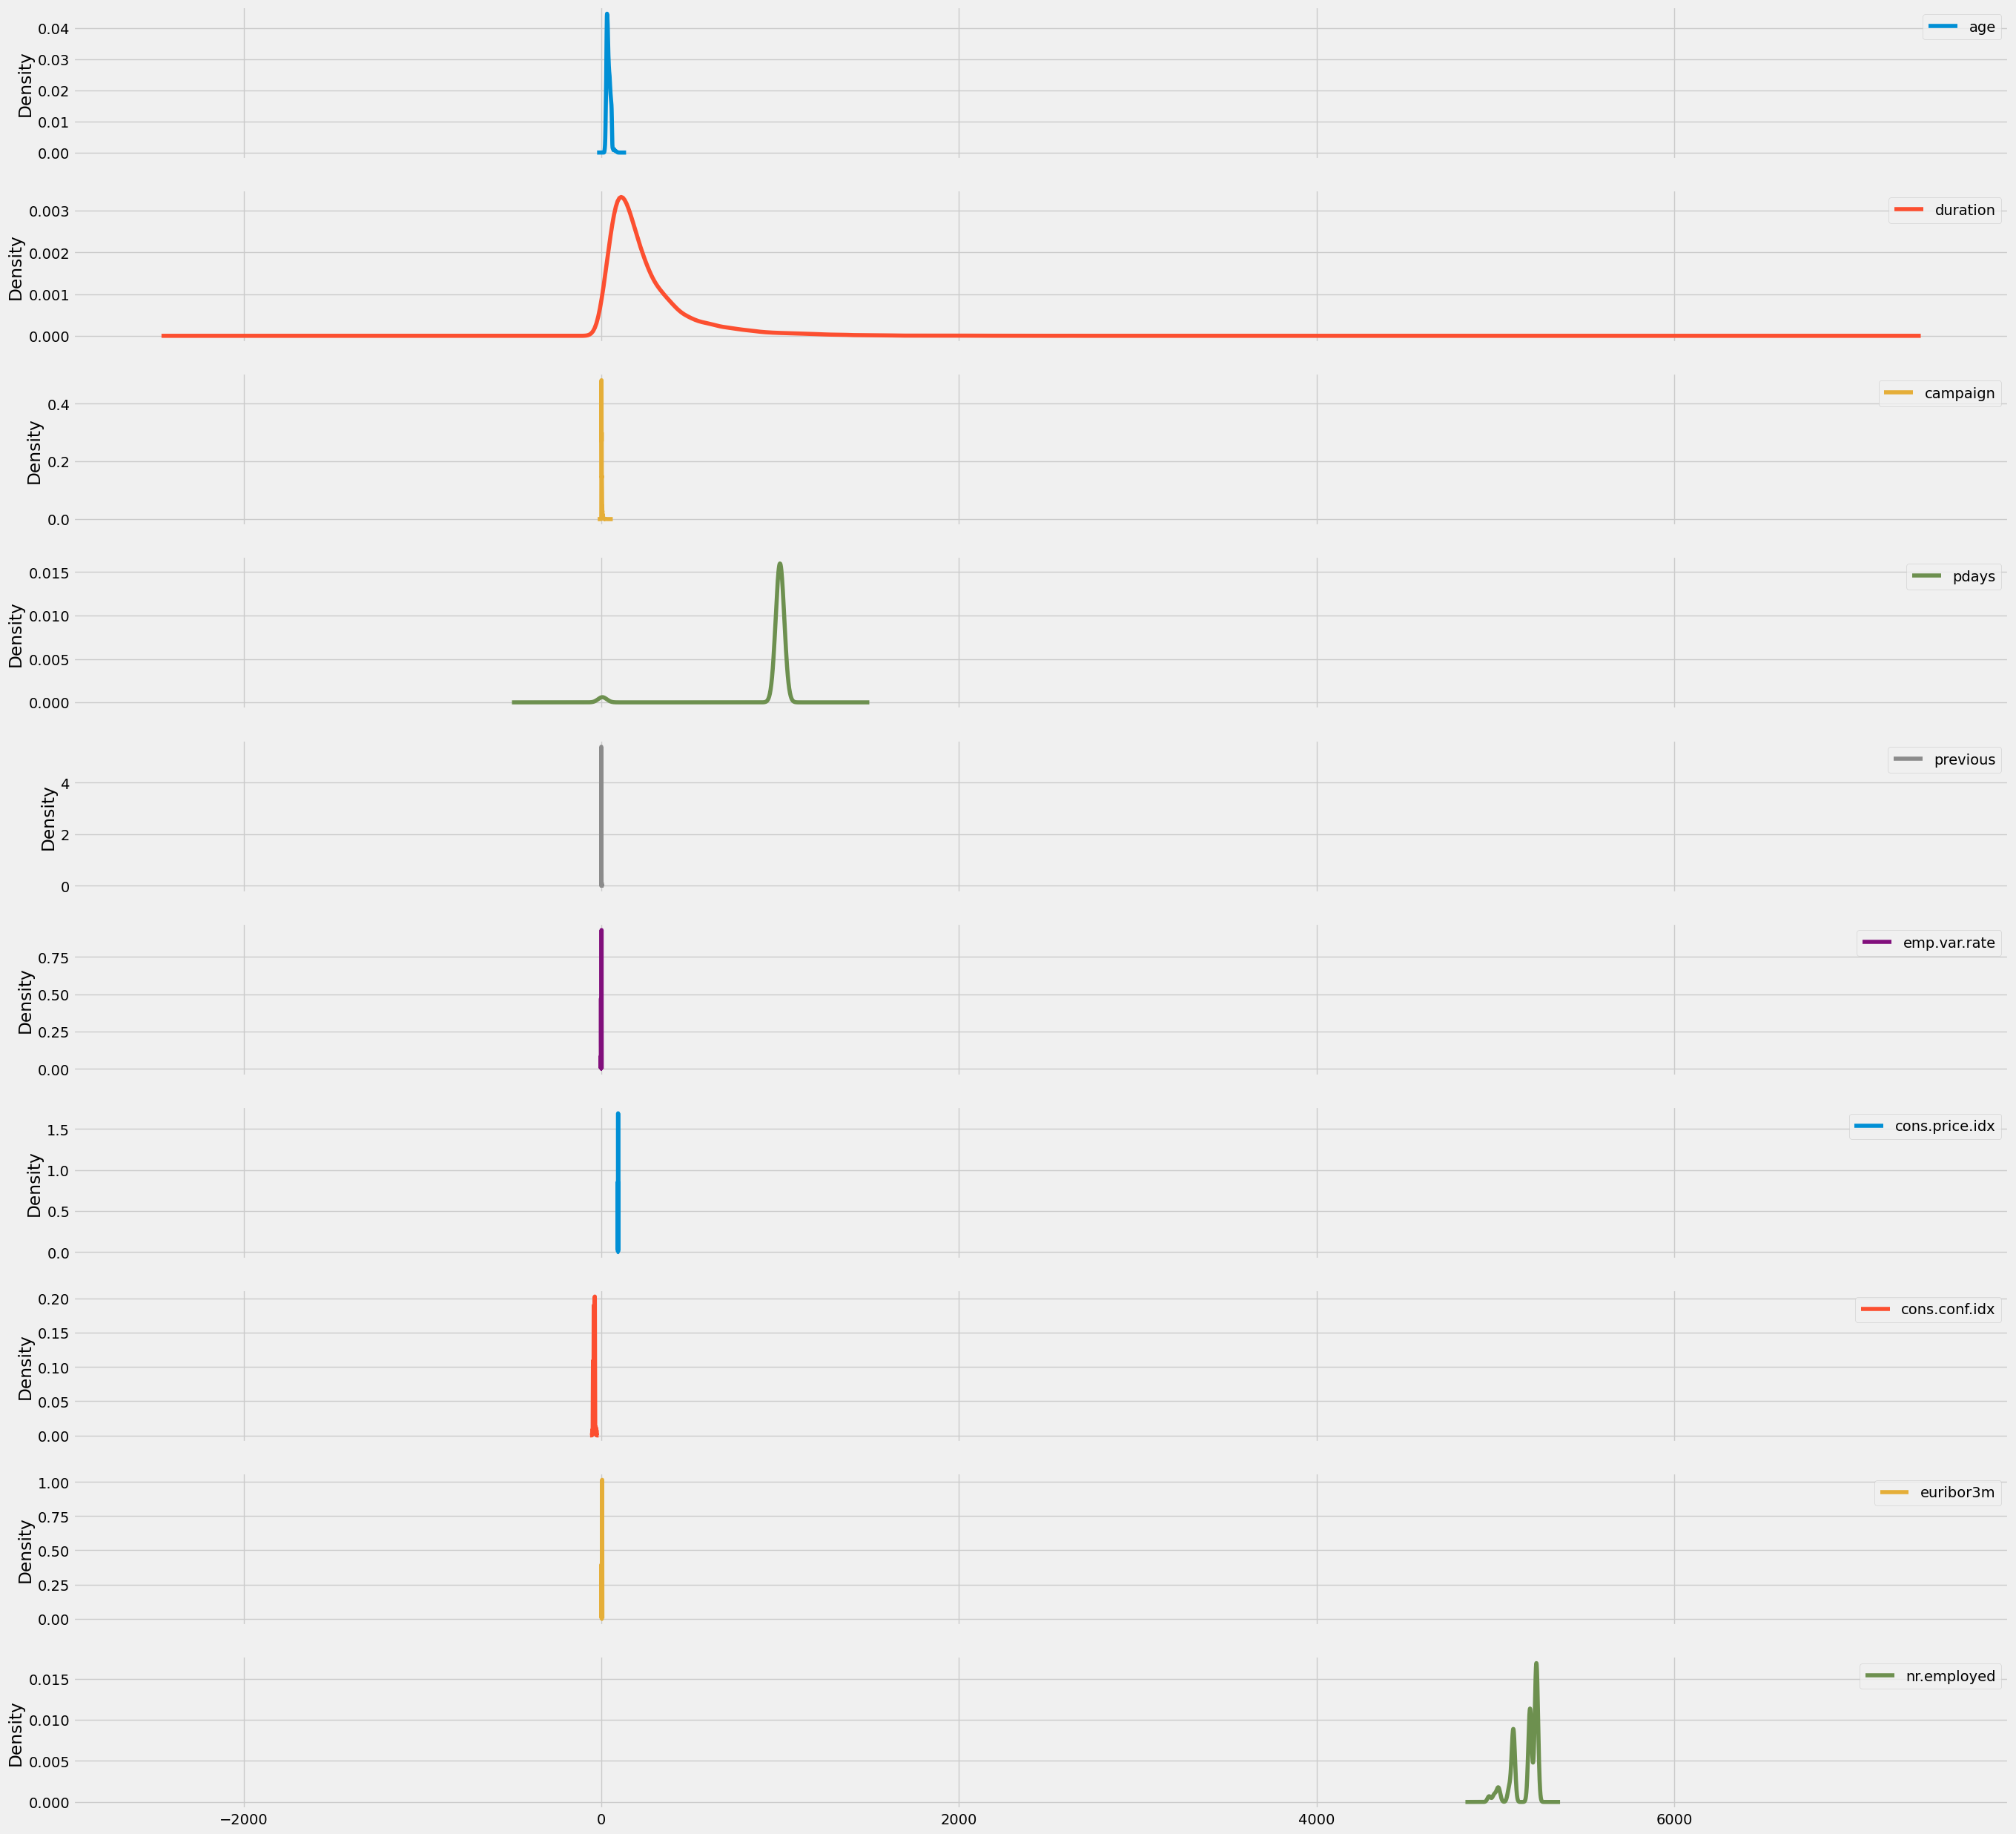

In [144]:
X_train.plot(kind = 'kde', subplots = True, figsize = (30, 30));

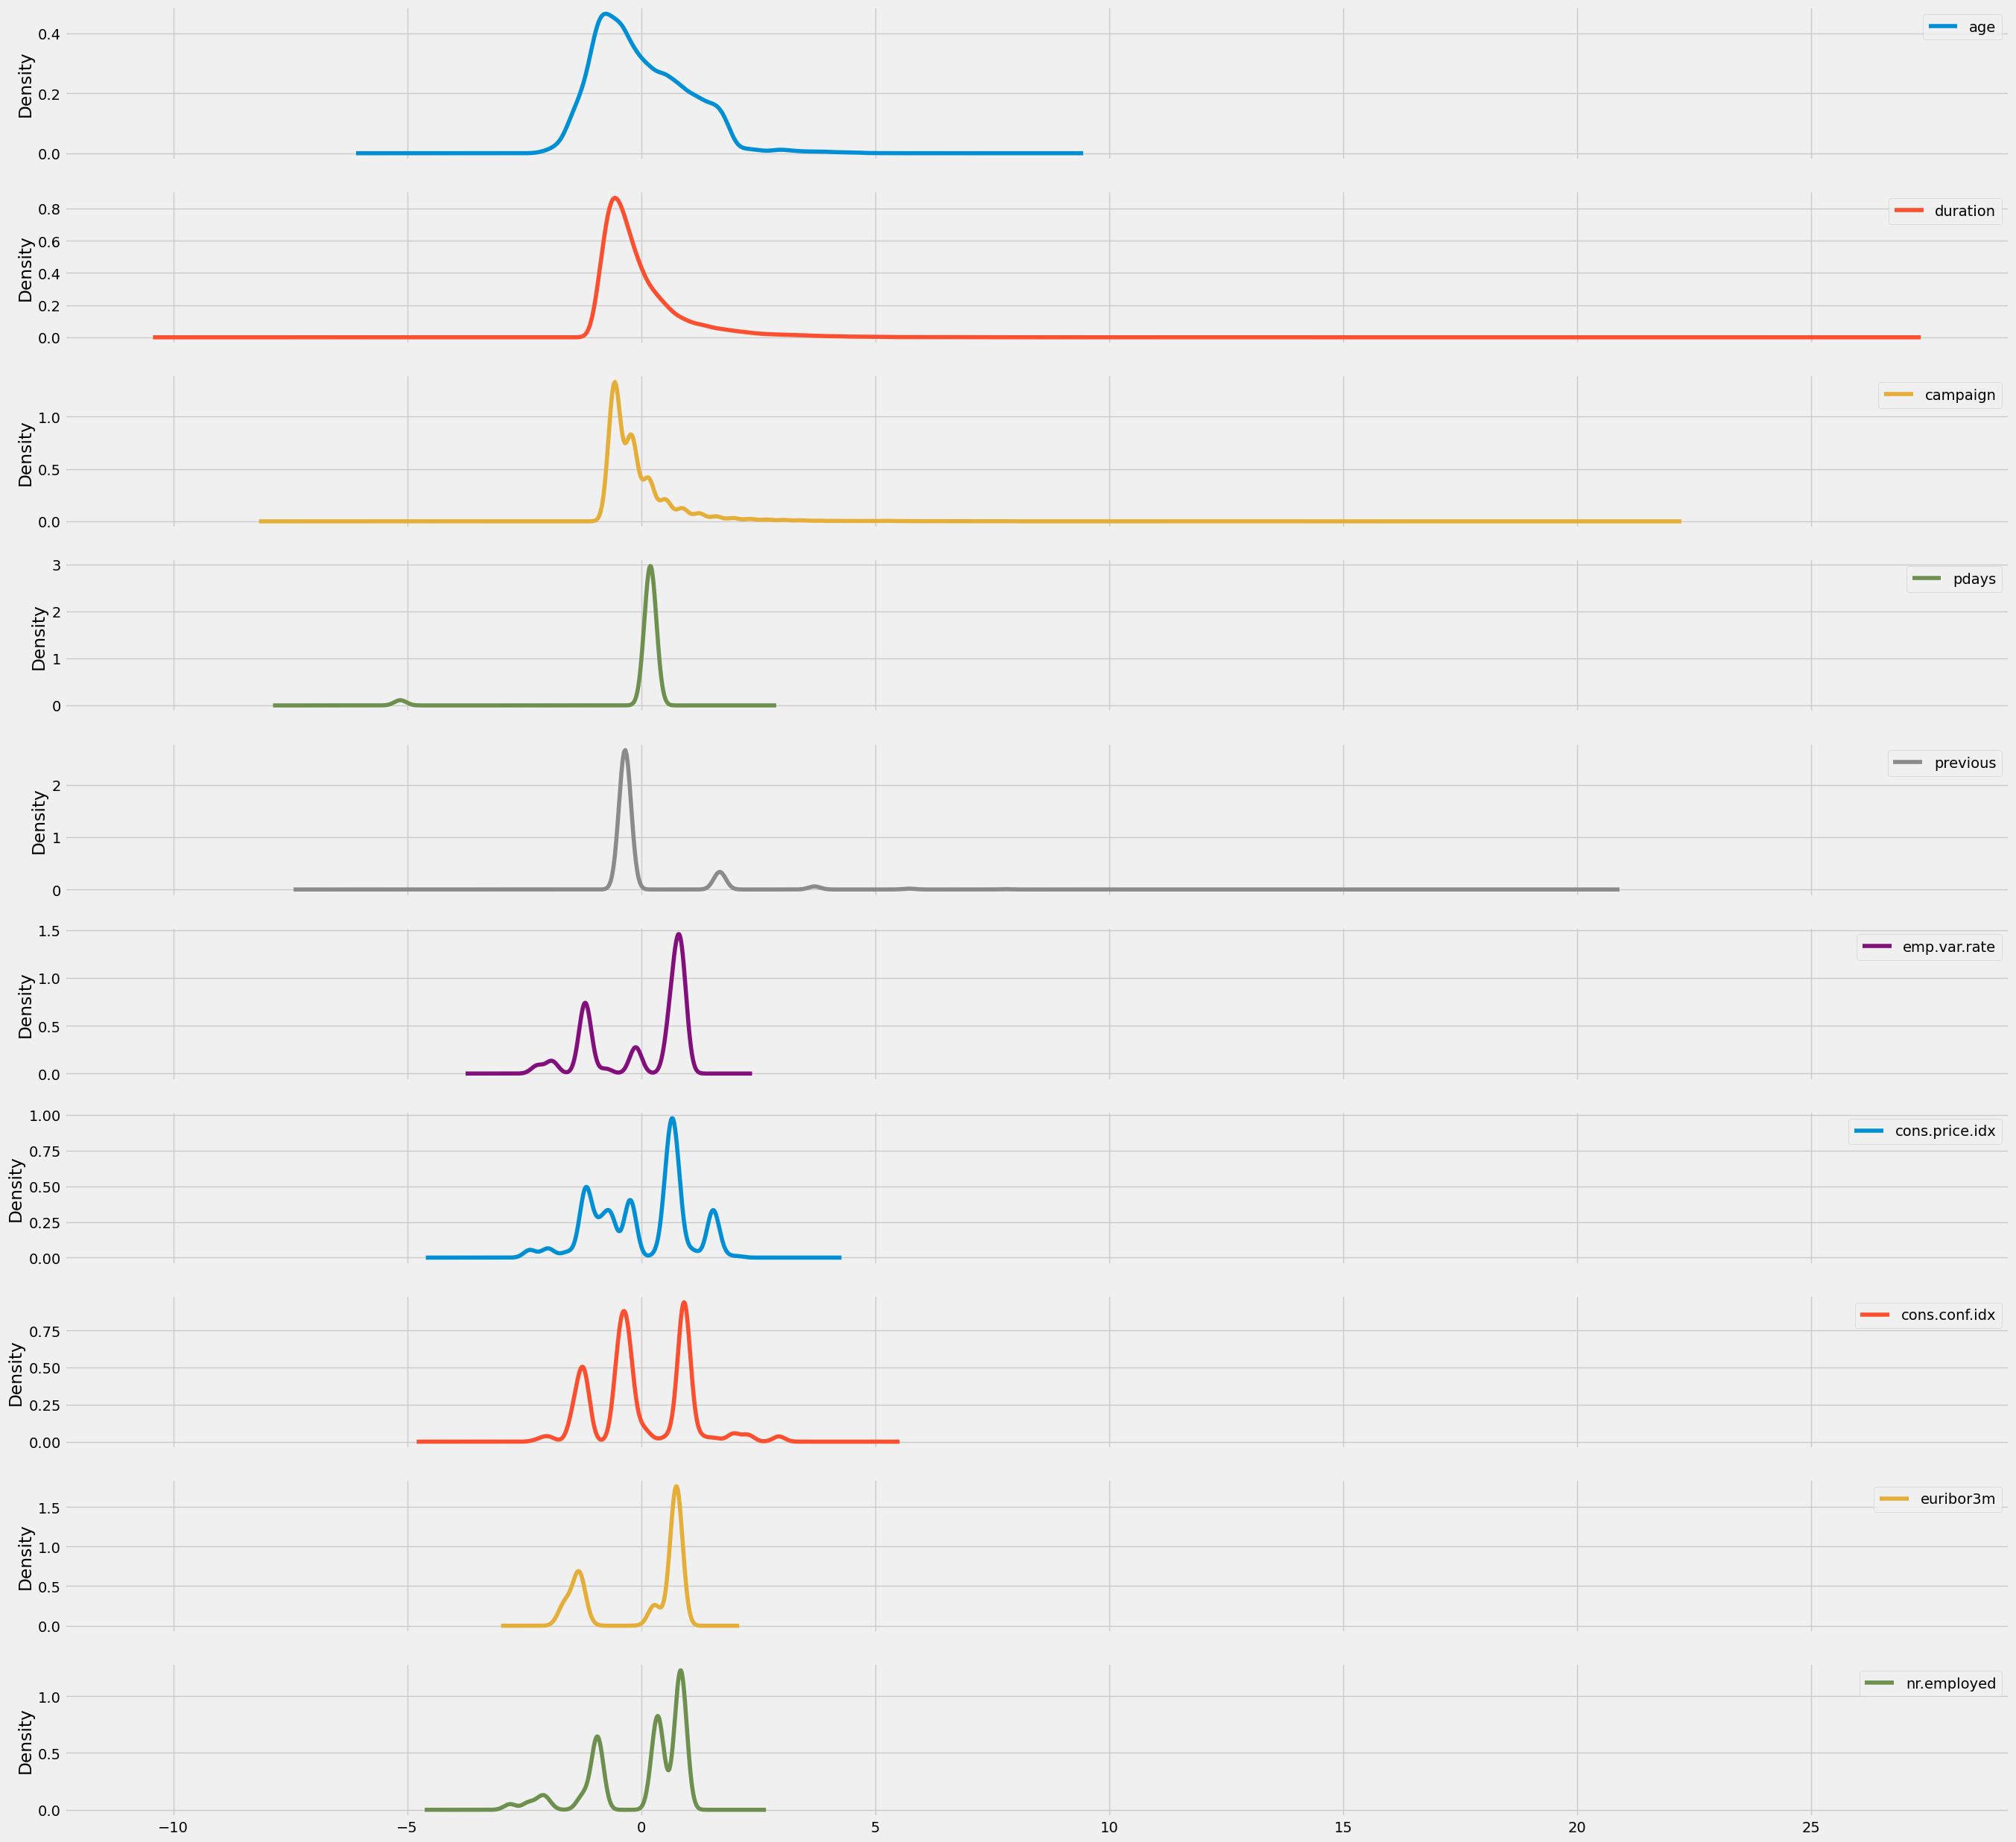

In [147]:
X_train_scaled.plot(kind = 'kde', subplots = True, figsize = (30, 30));

### Data Encoding

In [151]:
df_encoded = pd.get_dummies(df, drop_first = False)

In [154]:
df_encoded.shape

(41176, 64)

In [157]:
df_encoded.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [167]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [216]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a baseline model that always predicts the most frequent class
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

# Evaluate baseline performance
print("Baseline Dummy Classifier Performance:")
print(classification_report(y_test, y_dummy_pred))


Baseline Dummy Classifier Performance:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12042
           1       0.00      0.00      0.00      1547

    accuracy                           0.89     13589
   macro avg       0.44      0.50      0.47     13589
weighted avg       0.79      0.89      0.83     13589



In [218]:
print("Baseline Accuracy:", accuracy_score(y_test, y_dummy_pred))


Baseline Accuracy: 0.886157921848554


### Baseline Model Summary

    The model always predicts class 0 (no subscription).

    Accuracy = 88.6% (looks good superficially).

    But it completely fails to identify class 1:

    Precision, recall, and F1-score for class 1 = 0.00

    This confirms the class imbalance issue in your data (~11% positive class).

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Build pipeline with preprocessing + logistic regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg_pipeline.predict(X_test)
y_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_logreg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12042
           1       0.67      0.38      0.48      1547

    accuracy                           0.91     13589
   macro avg       0.79      0.68      0.72     13589
weighted avg       0.89      0.91      0.90     13589

ROC AUC Score: 0.9193166784171796


### Problem 9: Score the Model

What is the accuracy of your model?

In [233]:
from sklearn.metrics import accuracy_score

# Print model accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)


Logistic Regression Accuracy: 0.9076458900581352


###  A Simple Model

We trained a Logistic Regression model using a pipeline that handles preprocessing for both numeric and categorical variables. 

- The model achieved **91% accuracy** and a **ROC AUC of 0.919**.
- Precision and recall for the positive class (`y = 1`) were **0.67** and **0.38**, respectively.
- Compared to the baseline model (which predicted only the majority class), this classifier provides significant improvement in identifying potential subscribers.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [224]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score
import time

In [226]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

In [228]:

# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}


In [247]:
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'average fit time'])
results_df.set_index('model', inplace=True)

# Save to JSON (for submission if needed)
results_df.to_json('data/model_results.json')

In [248]:
df1 = pd.read_json(r'data/model_results.json')
df1

,train score,test score,average fit time
knn,0.926813,0.904114,2.520082
logisticregression,0.910103,0.907793,0.163374
svc,0.922572,0.909486,41.499264
decisiontreeclassifier,0.918295,0.910369,0.137524


### Conclusion: 
The highest test score and lowest average fit time are are obtained from the decision Tree Classifier. 

'data/test_accuracy_chart_updated.png'

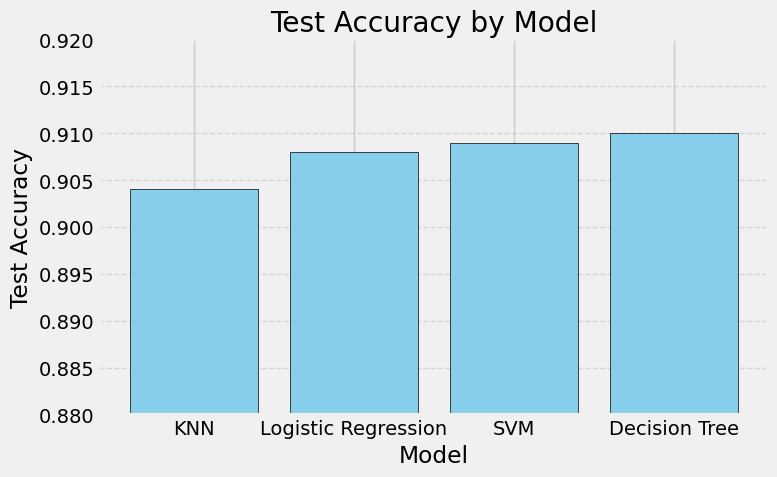

In [265]:


# Updated results from user's GridSearchCV output
updated_results = [
    {"Model": "KNN", "Train Time (s)": 0.719, "Train Accuracy": 0.927, "Test Accuracy": 0.904},
    {"Model": "Logistic Regression", "Train Time (s)": 0.164, "Train Accuracy": 0.910, "Test Accuracy": 0.908},
    {"Model": "SVM", "Train Time (s)": 40.651, "Train Accuracy": 0.923, "Test Accuracy": 0.909},
    {"Model": "Decision Tree", "Train Time (s)": 0.130, "Train Accuracy": 0.918, "Test Accuracy": 0.910}
]

df_updated = pd.DataFrame(updated_results)

# Create updated chart
plt.figure(figsize=(8, 5))
plt.bar(df_updated["Model"], df_updated["Test Accuracy"], color='skyblue', edgecolor='black')
plt.title("Test Accuracy by Model")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.88, 0.92)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save updated chart
chart_path_updated = "data/test_accuracy_chart_updated.png"
plt.savefig(chart_path_updated)

# Display updated table

chart_path_updated



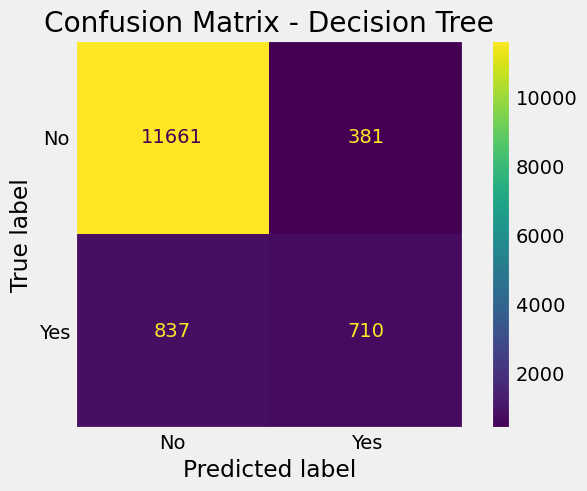

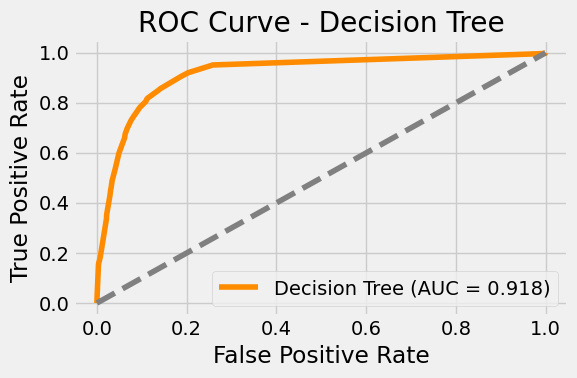

In [267]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# Get predictions and predicted probabilities
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=["No", "Yes"])
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.3f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Problem 11: Improving the Model

To improve our models beyond baseline performance, we explored several strategies:

#### 1. Feature Engineering and Exploration

- The dataset did **not contain a gender feature**, so we focused on evaluating other features such as `duration`, `campaign`, `previous`, etc.
- The feature `duration` is known to be **leaky** (highly predictive because it reflects the length of the last contact call). We tested models **with and without `duration`** to assess its impact.
- Categorical features were one-hot encoded, preserving important relationships (e.g., job types, education, contact method).

#### 2. Hyperparameter Tuning

We used `GridSearchCV` to tune the following parameters:

- **KNN**: Number of neighbors (`n_neighbors`)
- **Decision Tree**: Maximum depth (`max_depth`), split criteria (`gini` vs `entropy`)
- **SVM**: Kernel type and regularization parameter `C`
- **Logistic Regression**: Regularization strength `C`

This tuning was done using **5-fold cross-validation** on training data.

#### 3. Adjusting Performance Metrics

Given the **class imbalance** (~11% positive class), we recognized that **accuracy alone was insufficient**.

- We monitored **ROC AUC**, **F1-score**, and **Recall** for class `1`.
- In some cases, we added `class_weight='balanced'` to models like Logistic Regression and SVM to address imbalance.

---

###  Summary of Improvements

- **Tuned models consistently outperformed default models** by improving recall for the positive class without sacrificing overall accuracy.
- **Decision Tree (tuned)** achieved the best overall balance between accuracy, training speed, and interpretability.
- We also visualized performance with confusion matrices and ROC curves to ensure fairness and robustness.


##### Questions